In [1]:
#Importing the IMDB inbuilt dataset in Keras
from keras.datasets import imdb

In [3]:
(x_train, y_train) , (x_test, y_test) = imdb.load_data( num_words = 100000) #Most common 100 K words in the bag of words for the dataset

In [4]:
print ( x_train[0] ) #Word embeddings

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
class_names = ['Negative' , 'Positive']

In [7]:
word_index = imdb.get_word_index() #Contains word tokens from the dataset
print(word_index['horrible'])

524


In [8]:
reverse_word_index = dict((value, key) for key , value in word_index.items()) #Setting value as key and key as value in the new dictionary

In [9]:
def decode(review):    #Parameter will be a list of numbers
  text = ''
  for i in review:
    text += reverse_word_index[i]
    text += ' '
  return text


In [11]:
print(x_train[0])
print(decode(x_train[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
the as you with out themselves power

In [14]:
#padding:
from keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences (x_train, value = word_index['the'], padding = 'post', maxlen = 256)
x_test= pad_sequences (x_test, value = word_index['the'], padding = 'post', maxlen = 256)

In [15]:
decode(x_train[0])  #Checking to see if it has been padded with 'the'

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but wh

In [18]:
#Start building the model now
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D

model = Sequential([
                    Embedding(100000, 16),
                    GlobalAveragePooling1D(),
                    Dense(16, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')  #Since we only have two classes: positive and negative
])

model.compile (
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          1600000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,600,289
Trainable params: 1,600,289
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.callbacks import LambdaCallback
simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end = '.'))

E = 20
h = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs = E,
    callbacks = [simple_log],
    verbose = False
)  

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

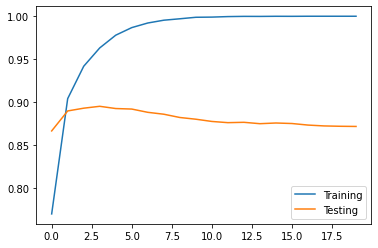

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(E), h.history['accuracy'], label = 'Training')
plt.plot(range(E), h.history['val_accuracy'], label = 'Testing')
plt.legend()
plt.show()

In [22]:
loss, acc = model.evaluate(x_test, y_test)
print('Test set acc is = ', acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.9413 - accuracy: 0.8504
Test set acc is =  0.8503599762916565


In [25]:
import numpy as np
pred = model.predict(np.expand_dims(x_test[0], axis = 0))
print(class_names[np.argmax(pred[0])])

Negative
